<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_04_reg_multivariada_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Laboratorio 04
## Marhia José Granada Restrepo

Objetivo: Programar una regresión multivariada

###1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados.


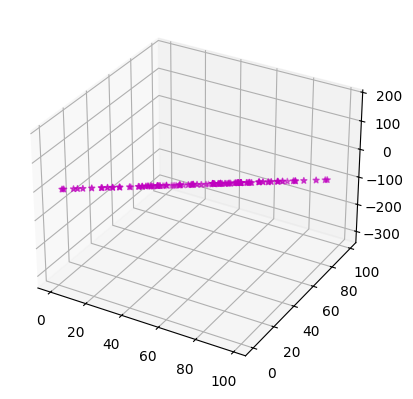

In [67]:
def f(x1, x2):
  return 2.1*x1 - 3.1*x2

m = 100
x1 = random.sample(range(100), m)
x2 = random.sample(range(100), m)
x1 = np.array(x1)
x2 = np.array(x2)
y = f(x1, x2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x1, x2, y, c='m', marker='*')
plt.show()

###2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [68]:
theta = np.random.rand(3, 1)
theta

array([[0.05633302],
       [0.13948953],
       [0.17975757]])

###3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [69]:
X_matrix = np.array(((np.ones(100)), x1, x2))
X_matrix.shape

(3, 100)

###4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $


In [70]:
def cost(theta, X):
  theta_copy = theta.copy()
  h = theta_copy.T @ X_matrix
  lambda_matrix = h.copy() - y # shape (1, 100)
  lambda_matrix_star = (h.copy() - y )**2 # shape (1, 100)
  lambda_data = lambda_matrix_star.copy().T # shape (100, 1)
  J = (1/(2*m)) * lambda_data.sum()
  return J, lambda_matrix

J, lambda_matrix = cost(theta, X_matrix)
J

np.float64(8137.138912485949)

###5. Aplicar el gradiente descendente:
  - Encontrar el gradiente.
  $\nabla J = \Lambda X.T$
  
  - Actualizar los nuevos parametros:
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

In [71]:
X_copy = X_matrix.copy()
lambda_copy = lambda_matrix.copy()
gradient = lambda_copy @ X_copy.T

alpha = 1e-6
new_theta = theta.copy() - alpha*gradient.copy().T

new_J , _ = cost(new_theta, X_matrix)
new_J #Disminuye

np.float64(5199.485653410692)

###6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.


In [72]:
for i in range(100):
  J, lambda_new = cost(new_theta, X_matrix)
  gradient = lambda_new @ X_matrix.T
  new_theta = new_theta - alpha*gradient.T

###7. Reescribir su código como una clase (ver ayuda)

In [73]:
class MultilinearRegresion():
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    Nfeatures, m = X.shape
    self.theta = np.random.random(Nfeatures).reshape(Nfeatures, 1)

  def model(self):
    self.h = self.theta.T @ self.X
    return self.h

  def cost(self):
    self.J =  np.mean((self.h - self.Y)**2)
    return self.J

  def update_params(self, learning_rate):
    """
    Gradiente descendente
    """
    grad = np.dot((self.h - self.Y), self.X.T).T
    self.theta = self.theta - learning_rate*grad
    return self.theta


  def fit(self, learning_rate):
    for i in range(0, 100):
      self.model()
      self.cost()
      self.update_params(learning_rate)

In [74]:
model = MultilinearRegresion(X_matrix, y)
model.fit(1e-6)
model.theta

array([[ 0.06015383],
       [ 2.0990281 ],
       [-3.10006446]])